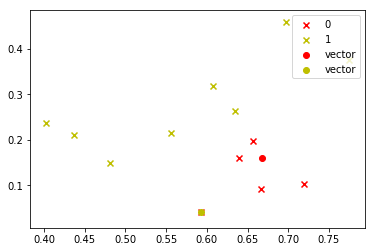

In [5]:
# -*- coding:utf-8 -*-
import re
import math
import numpy as np
import pylab as pl
data = \
"""1,0.697,0.46,Y,
2,0.774,0.376,Y,
3,0.634,0.264,Y,
4,0.608,0.318,Y,
5,0.556,0.215,Y,
6,0.403,0.237,Y,
7,0.481,0.149,Y,
8,0.437,0.211,Y,
9,0.666,0.091,N,
10,0.639,0.161,N,
11,0.657,0.198,N,
12,0.593,0.042,N,
13,0.719,0.103,N"""
#定义一个西瓜类，四个属性，分别是编号，密度，含糖率，是否好瓜
class watermelon:
    def __init__(self, properties):
        self.number = properties[0]
        self.density = float(properties[1])
        self.sweet = float(properties[2])
        self.good = properties[3]

#数据简单处理
a = re.split(',', data.strip(" "))
dataset = []     #dataset:数据集
for i in range(int(len(a)/4)):
    temp = tuple(a[i * 4: i * 4 + 4])
    dataset.append(watermelon(temp))


#计算欧几里得距离,a,b分别为两个元组
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0], 2)+math.pow(a[1]-b[1], 2))

#算法模型
def LVQ(dataset, a, max_iter):
    #统计样本一共有多少个分类
    T = list(set(i.good for i in dataset))
    #随机产生原型向量
    P = [(i.density, i.sweet) for i in np.random.choice(dataset, len(T))]
    while max_iter > 0:
        X = np.random.choice(dataset, 1)[0]
        index = np.argmin(dist((X.density, X.sweet), i) for i in P)
        t = T[index]
        if t == X.good:
            P[index] = ((1 - a) * P[index][0] + a * X.density, (1 - a) * P[index][1] + a * X.sweet)
        else:
            P[index] = ((1 + a) * P[index][0] - a * X.density, (1 + a) * P[index][1] - a * X.sweet)
        max_iter -= 1
    return P

def train_show(dataset, P):
    C = [[] for i in P]
    for i in dataset:
        C[i.good == 'Y'].append(i)
    return C

#画图
def draw(C, P):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j].density)
            coo_Y.append(C[i][j].sweet)
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
    #展示原型向量
    P_x = []
    P_y = []
    for i in range(len(P)):
        P_x.append(P[i][0])
        P_y.append(P[i][1])
        pl.scatter(P[i][0], P[i][1], marker='o', color=colValue[i%len(colValue)], label="vector")
    pl.legend(loc='upper right')
    pl.show()

P = LVQ(dataset, 0.01, 60)
C = train_show(dataset, P)
draw(C, P)
#原文链接：https://blog.csdn.net/u014028027/article/details/71799254